# Wstęp

## Źródło danych
Analiza została przeprowadzona na dwóch zbiorach danych z angielskiej ligi piłkarskiej Premier League:

- **Sezon 2020/2021** ("sezon covidowy") - dane z [Kaggle](https://www.kaggle.com/datasets/rajatrc1705/english-premier-league202021) (524 piłkarzy)
- **Sezon 2023/2024** (powrót do normalności) - dane z [Kaggle](https://www.kaggle.com/datasets/orkunaktas/premier-league-all-players-stats-2324) (570 piłkarzy)

Zbiory zawierają indywidualne statystyki piłkarzy takie jak:

- Statystyki dyscyplinarne (żółte kartki, faule)
- Dane ofensywne (gole, strzały, przewidywana liczba goli xG)
- Liczbę rozegranych meczów przez zawodników

## Cel analizy i hipoteza
Sezon 2020/21 rozgrywano **bez udziału publiczności** z powodu pandemii COVID-19, co stanowiło bezprecedensową sytuację w 128-letniej historii angielskiej ligi. Głównym celem badania jest sprawdzenie, jak ta wyjątkowa okoliczność wpłynęła na zachowania piłkarzy na boisku.

**Kontekst:**

- Pierwszy w historii sezon bez kibiców (od marca 2020 do maja 2021)
- Mecze rozgrywane w "sterylnych" warunkach (tylko sztuczny doping)
- Zawodnicy zgłaszali problemy z motywacją (źródło: wywiady BBC Sport)

**Wartość naukowa:**
Analiza pozwala zbadać:

→ Rzadką okazję naturalnego eksperymentu społecznego  
→ Obiektywny wpływ presji tłumu na dynamikę gry  
→ Efekt "cichego boiska" na podejmowanie decyzji taktycznych

**Główna hipoteza:**
"Brak presji kibiców w sezonie 2020/21 wpłynął na lepszą organizację defensywy, co przełożyło się na:

 - Mniejszą liczbę żółtych kartek (wynikającą z precyzyjniejszych interwencji obrońców)
 - Niższą skuteczność ofensywną przeciwników (mniej błędów defensywnych → mniej straconych goli mimo podobnych xG)"

<div style="height: 1em;"></div>
<div style="height: 1em;"></div>
<div style="height: 1em;"></div>

 *Expected Goals (xG)*: Metryka statystyczna określająca prawdopodobieństwo strzelenia gola z danej sytuacji, uwzględniająca m.in. dystans do bramki, kąt strzału, część ciała i rodzaj akcji. Wartość 0.3 xG oznacza np. 30% szans na gola w danej sytuacji.

# Analiza rozkładu przy pomocy metryk statystycznych

## Kwantyle  
**Definicja:**  
Wartości dzielące zbiór danych na części  

**Wyniki:**  

In [1]:
import matplotlib.pyplot as plt

# Dane
headers = ["Kwantyl", "2020/21", "2023/24"]
data = [
    ["Q1", 1, 1],
    ["Q2 (mediana)", 2, 2],
    ["Q3", 3, 4],
    ["90%", 5, 6]
]

# Stwórz figurę z większą wysokością
plt.figure(figsize=(6, 3), facecolor='white')  # Zwiększona wysokość (3 zamiast 2)

# Dodaj tabelę z większymi komórkami
table = plt.table(
    cellText=data,
    colLabels=headers,
    loc='center',
    cellLoc='center',
    colColours=['#f0f0f0']*3,  # Kolor nagłówków
    cellColours=[['white']*3]*4,  # Białe tło komórek
    bbox=[0, 0, 1, 1]  # Pełna szerokość/wysokość
)

# Zwiększ rozmiar czcionki i odstępy
table.auto_set_font_size(False)
table.set_fontsize(12)  # Większa czcionka

# Dostosuj wysokość wierszy
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    cell.set_height(0.25)  # Wyższe wiersze

# Ukryj osie
plt.axis('off')

# Zapisz jako PNG
plt.savefig("tabela_kwantyli.png", bbox_inches='tight', dpi=120, transparent=False)
plt.close()

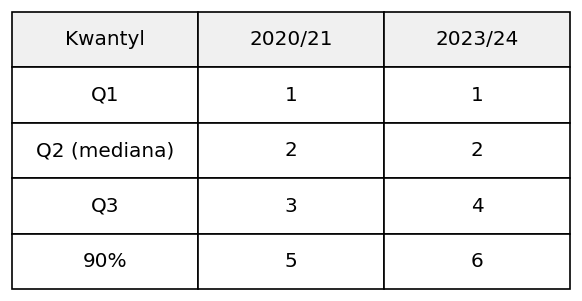

**Interpretacja:**  
 - Stabilność dolnej połowy rozkładu (Q1-Q2) sugeruje, że dla **typowego zawodnika** liczba kartek nie uległa zmianie. Różnice występują głównie wśród zawodników często faulujących(tzw. "policjanci") oraz specjalistów od gry zatrzymującej (znaczny wzrost w górnych partiach - Q3 i powyżej)
 
## Średnia arytmetyczna

**Definicja:**  
Średnia liczba żółtych kartek na zawodnika w sezonie  

**Wzór:**  
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i
$$

**Wyniki:**  
- Sezon 2020/21: **2.11**  
- Sezon 2023/24: **2.85**  *(wzrost o 35%)*

**Interpretacja:**  
Wzrost średniej o **35%** wskazuje na znaczący wzrost liczby żółtych kartek w sezonie 2023/24. Może to wynikać z:

- Większej presji psychicznej
- Większej intensywności gry przy pełnych trybunach
- Zmian taktycznych (np. popularność pressingów)

## Średnia harmoniczna
**Definicja:**  
Średnia stosowana dla danych o charakterze stosunków lub współczynników  

**Wzór:**  
$$
H = \frac{n}{\sum_{i=1}^{n}\frac{1}{x_i}}
$$

**Wyniki:**  
- Sezon 2020/21: **1.54**  
- Sezon 2023/24: **1.92** *(wzrost o 25%)*

**Interpretacja:**  
Niższe wartości niż średnia arytmetyczna wskazują na:  

- Silny wpływ wartości skrajnie wysokich  
- Większą wrażliwość na ekstrema w sezonie 2023/24  

## Średnia geometryczna  
**Definicja:**  
Średnia stosowana dla danych o charakterze proporcjonalnym 

**Wzór:**  
$$
G = \left(\prod_{i=1}^{n}x_i\right)^{1/n}
$$

**Wyniki:**  
- Sezon 2020/21: **1.78**  
- Sezon 2023/24: **2.31** *(wzrost o 30%)*

**Interpretacja:**  
Potwierdza ogólny trend wzrostowy przy:  

- Mniejszej wrażliwości na ekstrema niż średnia arytmetyczna  
- Lepszym odzwierciedleniu typowych wartości  

## Średnia ucinana (10%)  
**Definicja:**  
Średnia obliczona po odrzuceniu 10% skrajnych wartości  

**Wzór:**  
$$
\bar{x}_{tr} = \frac{1}{n-2k}\sum_{i=k+1}^{n-k}x_i
$$

**Wyniki:**  
- Sezon 2020/21: **1.98**  
- Sezon 2023/24: **2.52** *(wzrost o 27%)*

**Interpretacja:**  
Mniejszy wzrost niż dla pełnej średniej sugeruje:  

- Znaczący udział wartości skrajnych w różnicy między sezonami  
- Względną stabilność "rdzenia" rozkładu  

## Średnia winsorowska (10%)  
**Definicja:**  
Średnia gdzie skrajne wartości są zastępowane percentylami  

**Wzór:**  
$$
\bar{x}_w = \frac{1}{n}\left((k+1)x_{(k+1)} + \sum_{i=k+2}^{n-k+1}x_i + (k+1)x_{(n-k)}\right)
$$

**Wyniki:**  
- Sezon 2020/21: **2.03**  
- Sezon 2023/24: **2.61** *(wzrost o 29%)*

**Interpretacja:**  
Potwierdza wnioski ze średniej ucinanej przy:  

- Zachowaniu pełnej liczby obserwacji  
- Mniejszej wrażliwości na ekstrema

## Współczynnik skośności
**Definicja:**  
Miara asymetrii rozkładu  

**Wzór:**  
$$
\alpha = \frac{n}{(n-1)(n-2)} \sum_{i=1}^n \left(\frac{x_i - \overline{x}}{S}\right)^3
$$

**Wyniki:**  
- Sezon 2020/21: **1.26**  
- Sezon 2023/24: **1.13**

**Interpretacja:**  
Dodatnia skośność (prawostronna) wskazuje na:

- Obecność piłkarzy z wysoką liczbą kartek
- W sezonie covidowym asymetria była bardziej wyraźna

## Kurtoza
**Definicja:**  
Miara koncentracji danych wokół średniej  

**Wzór:**  
$$
K = \frac{E[(X-\mu)^4]}{\sigma^4}
$$

**Wyniki:**  
- Sezon 2020/21: **4.53**  
- Sezon 2023/24: **3.72**

**Interpretacja:**  
Wysokie wartości (>3) oznaczają:

- "Spiczasty" rozkład z grubymi ogonami
- W sezonie 2020/21 większa koncentracja wyników wokół średniej

## Odchylenie standardowe
**Definicja:**  
Miara rozproszenia danych wokół średniej  

**Wzór:**  
$$
\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2}
$$

**Wyniki:**  
- Sezon 2020/21: **2.27**  
- Sezon 2023/24: **2.86**

**Interpretacja:**  
Wzrost odchylenia o **26%** pokazuje:

- Większe zróżnicowanie między "spokojnymi" a "agresywnymi" zawodnikami

## Odchylenie przeciętne od średniej  
**Definicja:**  
Średnie odchylenie od wartości średniej  

**Wzór:**  
$$
MD = \frac{1}{n}\sum_{i=1}^{n}|x_i - \bar{x}|
$$

**Wyniki:**  
- Sezon 2020/21: **1.82**  
- Sezon 2023/24: **2.33** *(wzrost o 28%)*

**Interpretacja:**  
Współgra ze wzrostem odchylenia standardowego: 

- Potwierdza większą zmienność wyników  
- Wskazuje na rozproszenie wokół wyższej średniej  

## Wariancja  
**Definicja:**  
Średnia kwadratów odchyleń od średniej  

**Wzór:**  
$$
S^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2
$$

**Wyniki:**  
- Sezon 2020/21: **5.15**  
- Sezon 2023/24: **8.18** *(wzrost o 59%)*

**Interpretacja:**  
Wyraźny wzrost zgodny z:  

- Zaobserwowanym zwiększeniem rozrzutu  
- Większą liczbą ekstremalnych przypadków  

## Rozstęp
**Definicja:**  
Różnica między wartością maksymalną a minimalną  

**Wyniki:**  
- Sezon 2020/21: **12**  
- Sezon 2023/24: **13**

**Wnioski:**  
Ekstremalne przypadki (zawodnicy z >10 kartkami) stały się jeszcze częstsze

## Kluczowe wnioski
1. **Wzrost agresji**: Średnia liczba kartek wzrosła o 35%, przy stabilnej medianie
2. **Zróżnicowanie taktyk:**: Większe odchylenie wskazuje na różnicowanie stylów gry
3. **Ekstrema**: Wzrost maksymalnej liczby kartek (12→13) przy tym samym minimum (0)
4. **Stabilny wzorzec**: – Większość zawodników z niewielką liczbą kartek

**Kontekst sportowy**: Wyniki potwierdzają hipotezę o wpływie kibiców - powrót publiczności skorelowany jest z:

- Większą intensywnością gry
- Większą liczbą interwencji sędziowskich
- Większym zróżnicowaniem między stylami drużyn

# Prezentacja rozkładów na wykresach

## Wprowadzenie metodologiczne
Do wizualizacji różnic między sezonami wykorzystano następujące typy wykresów:

**Wykres pudełkowy** - pokazuje medianę, kwartyle i wartości odstające, co pozwala na porównanie rozkładów w sposób odporny na ekstrema

**Rozkład gęstości** - uwidacznia kształt rozkładu prawdopodobieństwa

**Dystrybuanta** - pokazuje skumulowane prawdopodobieństwo, umożliwia porównanie całych rozkładów i identyfikację różnic w prawdopodobieństwach dla różnych wartości.

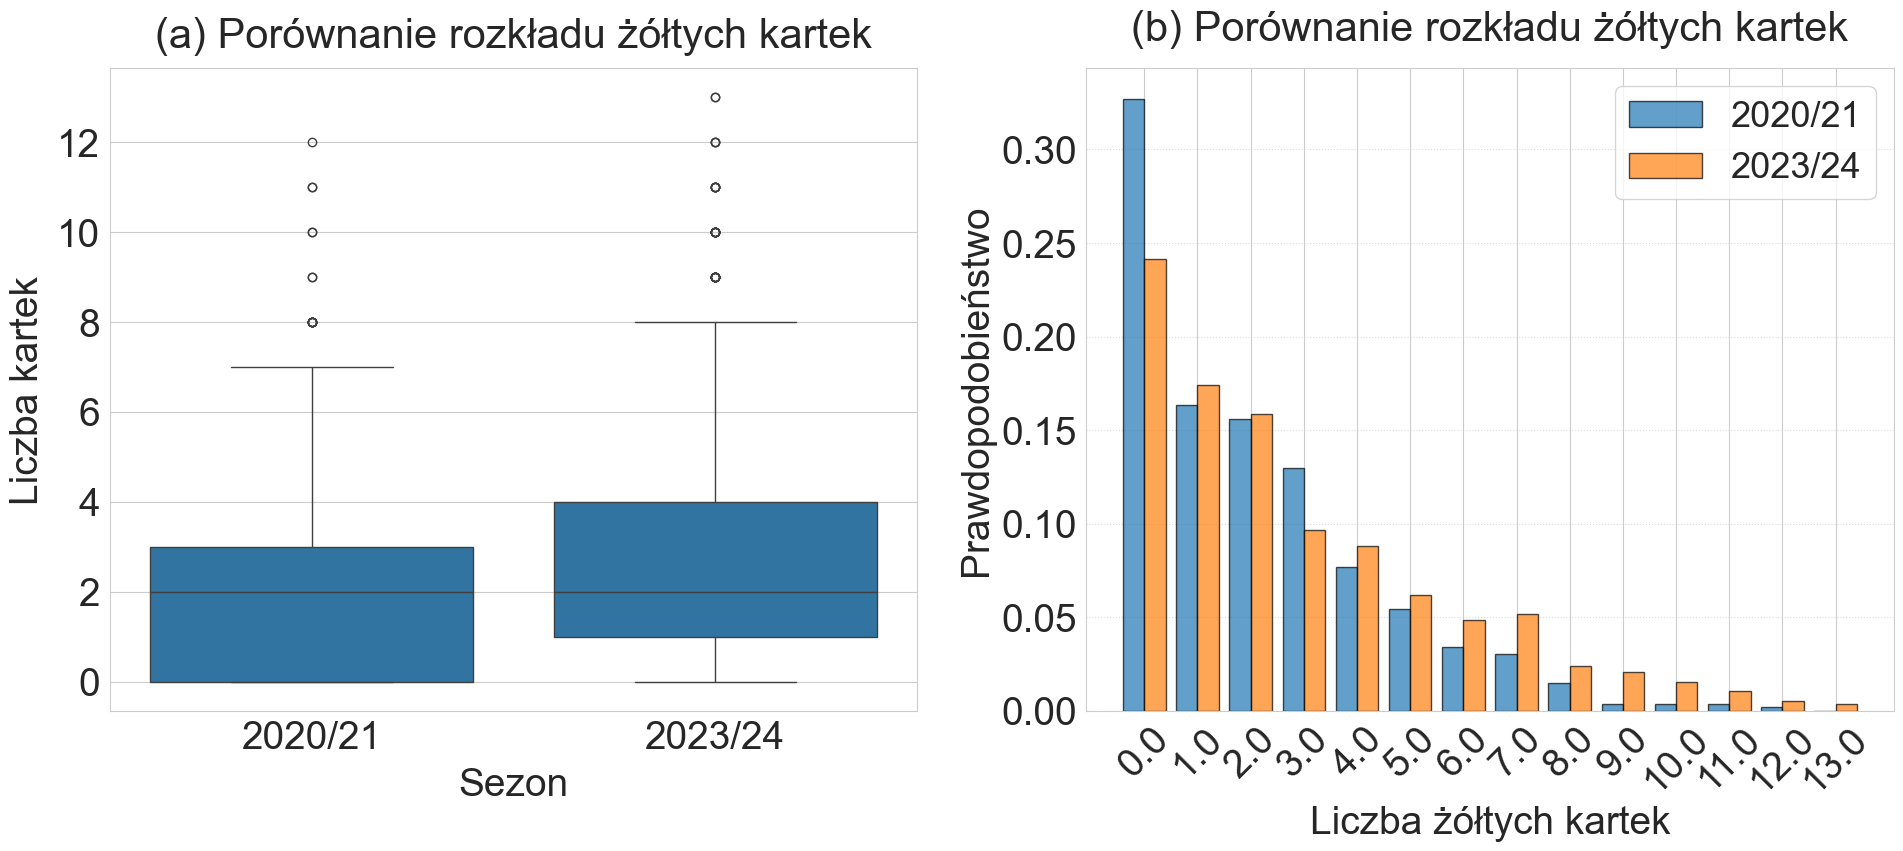

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import numpy as np
# Wczytanie danych z podanych ścieżek
sciezka2021 = "C:/Users/jakub/Downloads/EPL_20_21.csv"
sciezka2024 = "C:/Users/jakub/Downloads/premier-player-23-24.csv"


df_2021 = pd.read_csv(sciezka2021)
df_2024 = pd.read_csv(sciezka2024)


# Wybór kolumn z żółtymi kartkami (bez zmiany nazw)
yellow_2021 = df_2021[['Name', 'Yellow_Cards']].copy()
yellow_2024 = df_2024[['Player', 'CrdY']].copy()

# Dodanie informacji o sezonie
yellow_2021['Season'] = '2020/21'
yellow_2024['Season'] = '2023/24'

# Przygotowanie danych do porównania    
comparison_data = pd.concat([
    yellow_2021.rename(columns={'Name': 'Player', 'Yellow_Cards': 'Yellows'}),
    yellow_2024.rename(columns={'CrdY': 'Yellows'})
])

# Statystyki opisowe


import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia ogólne wykresu
plt.figure(figsize=(20, 16))  # Zmniejszony rozmiar dla lepszego dopasowania
plt.rcParams['font.size'] = 28  # Ustawienie domyślnego rozmiaru czcionki

# 1. Porównanie rozkładów
plt.subplot(2, 2, 1)
sns.boxplot(x='Season', y='Yellows', data=comparison_data)
plt.title('(a) Porównanie rozkładu żółtych kartek', pad=15, fontsize=30)
plt.xlabel('Sezon', labelpad=8)
plt.ylabel('Liczba kartek', labelpad=8)

# 2. Rozkład gęstości
plt.subplot(2, 2, 2)
counts_2021 = comparison_data[comparison_data['Season'] == '2020/21']['Yellows'].value_counts(normalize=True).sort_index()
counts_2024 = comparison_data[comparison_data['Season'] == '2023/24']['Yellows'].value_counts(normalize=True).sort_index()


all_values = sorted(set(counts_2021.index).union(set(counts_2024.index)))
counts_2021 = counts_2021.reindex(all_values, fill_value=0)
counts_2024 = counts_2024.reindex(all_values, fill_value=0)


bar_width = 0.4
x_positions = np.arange(len(all_values))


plt.bar(x_positions - bar_width/2, counts_2021, width=bar_width, 
        alpha=0.7, label='2020/21', color='#1f77b4', edgecolor='black')
plt.bar(x_positions + bar_width/2, counts_2024, width=bar_width, 
        alpha=0.7, label='2023/24', color='#ff7f0e', edgecolor='black')

plt.title('(b) Porównanie rozkładu żółtych kartek', fontsize=30, pad=20)
plt.xlabel('Liczba żółtych kartek', fontsize=28)
plt.ylabel('Prawdopodobieństwo', fontsize=28)
plt.xticks(x_positions, all_values, rotation=45 if len(all_values) > 10 else 0)
plt.legend(fontsize=26)
plt.grid(axis='y', linestyle=':', alpha=0.7)

# Dopasowanie
plt.tight_layout()
plt.show()

# 3. Top zawodnicy 2020/21


# Dopasowanie layoutu


# Zapis do PDF



# Analiza dodatkowa: kartki na mecz
df_2021['Cards_per_match'] = df_2021['Yellow_Cards'] / df_2021['Matches']
df_2024['Cards_per_match'] = df_2024['CrdY'] / df_2024['MP']






## Interpretacja wykresów
Mimo że mediana pozostała niezmieniona (2 kartki w obu sezonach), rozkład gęstości ujawnia znaczące różnice. W sezonie covidowym 2020/21 wyraźnie dominowała wartość 0, tworząc ostry szczyt rozkładu. Natomiast sezon 2023/24 prezentuje się zupełnie inaczej - rozkład jest wyraźnie spłaszczony, z mocno zaznaczonym prawym ogonem. To właśnie ta różnica jest najbardziej wymowna: zawodnicy z 5+ żółtymi kartkami występują niemal dwukrotnie częściej w sezonie z kibicami, co bezpośrednio przekłada się na wzrost średniej z 2.11 do 2.85 kartki na zawodnika. Zmiana ta jest szczególnie widoczna wśród najbardziej karnych piłkarzy, co dobrze ilustruje poniższy wykres przedstawiający liderów pod względem liczby żółtych kartek w obu sezonach.

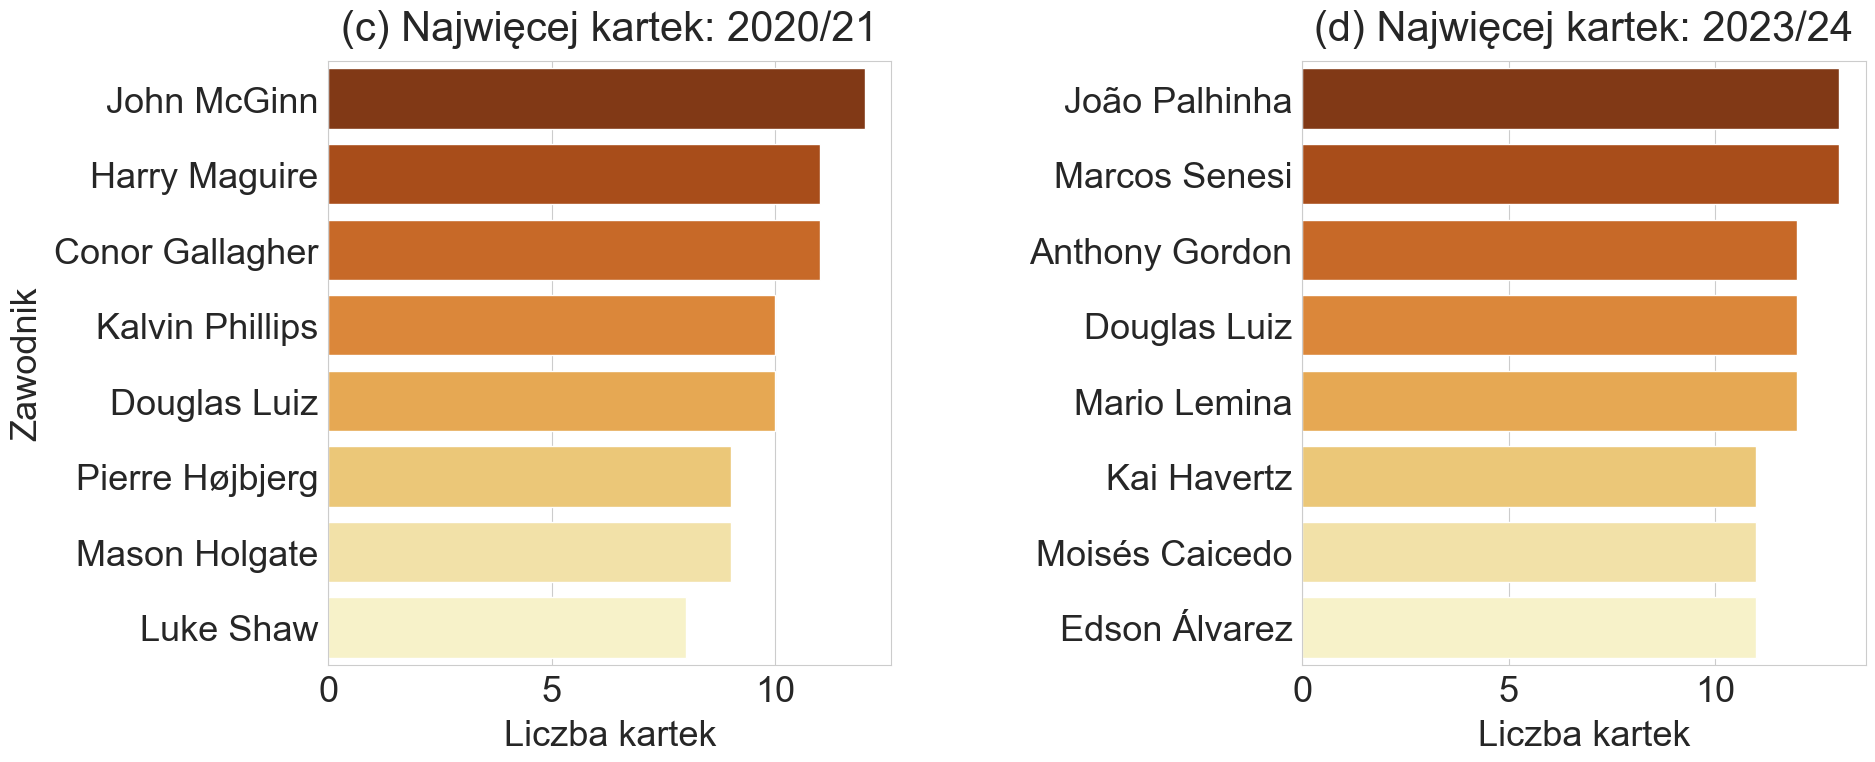

In [9]:
plt.figure(figsize=(20, 16))  # Zmniejszony rozmiar dla lepszego dopasowania
plt.rcParams['font.size'] = 26  # Ustawienie domyślnego rozmiaru czcionki
plt.subplot(2, 2, 1)
top_2021 = yellow_2021.nlargest(8, 'Yellow_Cards')
sns.barplot(x='Yellow_Cards', y='Name', data=top_2021, hue='Name', palette='YlOrBr_r', legend=False)
plt.title('(c) Najwięcej kartek: 2020/21', pad=15, fontsize=30)
plt.xlabel('Liczba kartek', labelpad=8)
plt.ylabel('Zawodnik', labelpad=8)

# 4. Top zawodnicy 2023/24
plt.subplot(2, 2, 2)
top_2024 = yellow_2024.nlargest(8, 'CrdY')
sns.barplot(x='CrdY', y='Player', data=top_2024, hue='Player', palette='YlOrBr_r', legend=False)
plt.title('(d) Najwięcej kartek: 2023/24', pad=15, fontsize=30)
plt.xlabel('Liczba kartek', labelpad=8)
plt.ylabel('', labelpad=8)

# Dopasowanie layoutu
plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)

# Zapis do PDF
plt.show()

Wykresy wyraźnie pokazują, że w sezonie 2023/24 nie tylko zwiększyła się liczba ekstremalnych przypadków, ale też wzrosła minimalna liczba kartek potrzebna do znalezienia się w czołówce. Podczas gdy w sezonie 2020/21 górna granica wynosiła 12 kartek, w ostatnim sezonie aż pięciu zawodników wyrównało lub przekroczyło ten wynik. Co więcej, minimalna liczba kartek potrzebna do znalezienia się w czołówce wzrosła z 8 do 11.

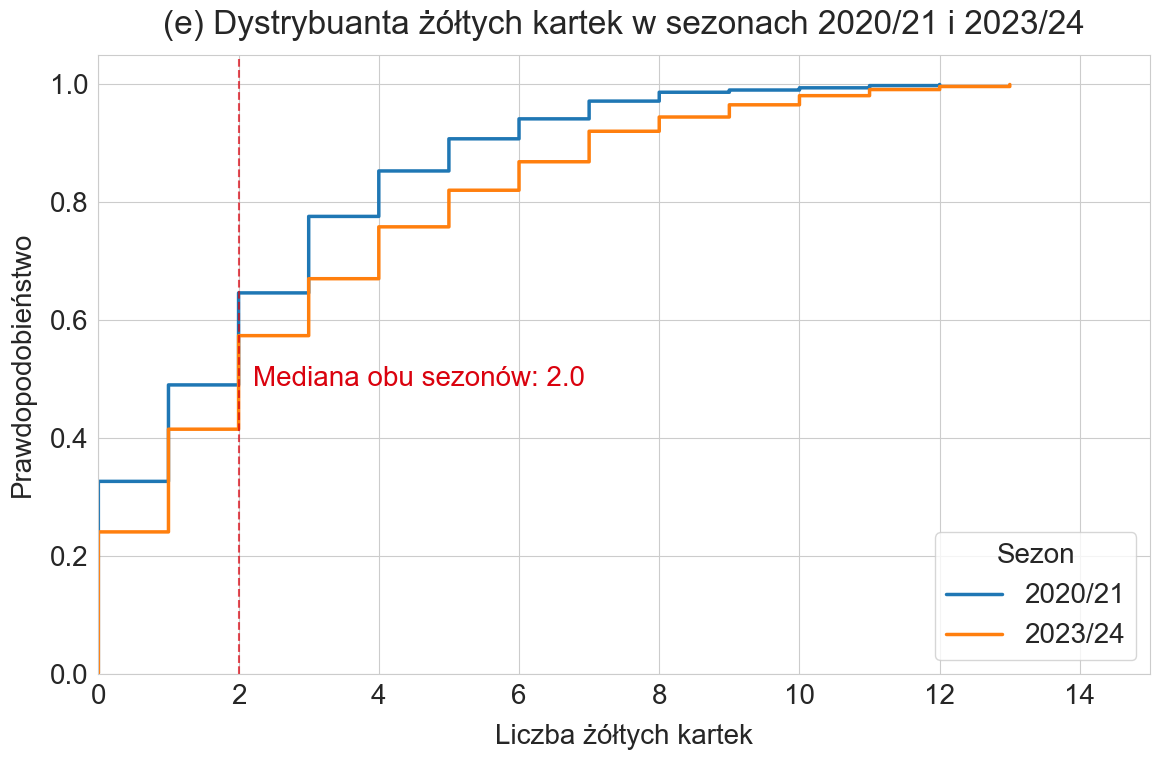

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Wczytanie danych
sciezka2021 = "C:/Users/jakub/Downloads/EPL_20_21.csv"
sciezka2024 = "C:/Users/jakub/Downloads/premier-player-23-24.csv"

df_2021 = pd.read_csv(sciezka2021)
df_2024 = pd.read_csv(sciezka2024)

# Przygotowanie danych
yellow_2021 = df_2021['Yellow_Cards'].rename('Yellows')
yellow_2024 = df_2024['CrdY'].rename('Yellows')

# Obliczenie dystrybuant empirycznych
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

x_2021, y_2021 = ecdf(yellow_2021.dropna())
x_2024, y_2024 = ecdf(yellow_2024.dropna())

# Konfiguracja wykresu
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 20
sns.set_style("whitegrid")

# Wykres dystrybuanty
plt.step(x_2021, y_2021, where='post', label='2020/21', linewidth=2.5, color='#1f77b4')
plt.step(x_2024, y_2024, where='post', label='2023/24', linewidth=2.5, color='#ff7f0e')

# Zaznaczenie mediany
median_2021 = yellow_2021.median()
median_2024 = yellow_2024.median()
plt.axvline(median_2021, color='#1f77b4', linestyle='--', alpha=0)
plt.axvline(median_2024, color='#DA020E', linestyle='--', alpha=0.7)

# Opis wykresu
plt.title('(e) Dystrybuanta żółtych kartek w sezonach 2020/21 i 2023/24', pad=15, fontsize=24)
plt.xlabel('Liczba żółtych kartek', labelpad=10)
plt.ylabel('Prawdopodobieństwo', labelpad=10)
plt.legend(title='Sezon', loc='lower right')
plt.xlim(0, 15)
plt.ylim(0, 1.05)

# Dodatkowe adnotacje
plt.text(median_2021+0.2, 0.5, f'Mediana obu sezonów: {median_2021}', 
         color='#DA020E', va='center')


plt.tight_layout()
plt.savefig('dystrybuanta_kartek.png', dpi=300, bbox_inches='tight')
plt.show()

Dystrybuanta pokazuje, że w sezonie 2023/24 wzrosło prawdopodobieństwo otrzymania większej liczby kartek. Na początku i środku rozkładu widoczne są wyraźne różnice między sezonami, które stopniowo zmniejszają się dla wyższych wartości, gdzie krzywe niemal się zbiegają.

# Dane wspierające hipotezę
Aby zweryfikować hipotezę, że obrońcy prezentowali wyższą skuteczność w sezonie 2020/21 (rozgrywanym bez kibiców), przeprowadziliśmy porównanie statystyk bramkowych w dwóch kluczowych wymiarach:

 - Produktywność indywidualna – analiza liczby goli dla poszczególnych zawodników,
 - Skuteczność drużynowa – porównanie średniej liczby goli na mecz w całej lidze między sezonami.

Wyniki wykazały istotną różnicę: w sezonie 2020/21 na mecz przypadało średnio 2.69 gola, podczas gdy w 2023/24 (z kibicami) wartość ta wzrosła do 3.28 gola. Ta znacząca zmiana sugeruje, że obecność kibiców mogła wpłynąć na tempo gry i skuteczność ataku, pośrednio potwierdzając naszą tezę o lepszej grze obrońców w warunkach ograniczonej presji zewnętrznej.


## Produktywność indywidualna
Sprawdźmy, jak te zmiany wyglądają w ujęciu indywidualnym.

In [160]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Dane
data = {
    'Statystyka': ['Średnia', 'Q1', 'Mediana', 'Q3', 'Średnia ucinana (10%)', 
                  'Odchylenie standardowe', 'Wariancja'],
    '2020/21': [1.85, 0.00, 1.00, 2.00, 1.02, 3.34, 11.14],
    '2023/24': [2.06, 0.00, 1.00, 2.00, 1.20, 3.62, 13.11]
}
df = pd.DataFrame(data)

# Konfiguracja stylu
rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(10, 3), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Ukrycie osi
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Tworzenie tabeli
table = plt.table(cellText=df.values,
                 colLabels=df.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#f7f7f7']*3)

# Formatowanie
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Zwiększenie odstępów pionowych

# Nagłówek
plt.title('Statystyki liczby goli strzelonych przez zawodników\n', 
          fontsize=14, pad=20)

# Zapis do pliku
plt.savefig('statystyki_goli.png', 
            bbox_inches='tight', 
            dpi=150, 
            facecolor='white')
plt.close()

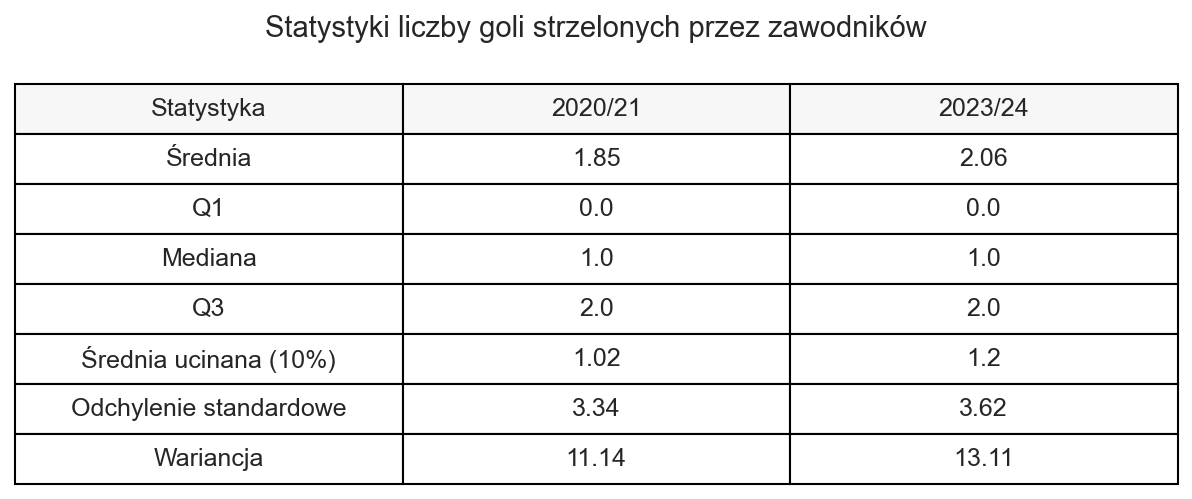

Analiza statystyk liczby goli strzelonych przez zawodników w sezonach 2020/21 i 2023/24 ujawnia kilka istotnych aspektów. Przede wszystkim widoczny jest wzrost średniej liczby goli z 1.85 do 2.06 na zawodnika, co sugeruje zwiększoną skuteczność ofensywną w sezonie z kibicami. Jednak najbardziej znaczącym spostrzeżeniem jest ogromna rozbieżność między średnią a średnią ucinaną (10%), która wynosiła odpowiednio 1.02 i 1.2 - ta różnica wyraźnie pokazuje, jak silnie wyniki całej ligi są zawyżane przez wąską grupę elitarnych napastników. Rozkład goli jest wyraźnie prawoskośny, o czym świadczy fakt, że mediana utrzymuje się na poziomie zaledwie 1 gola, podczas gdy 25% zawodników nie strzeliło ani jednego gola. Jednocześnie wzrost wariancji z 11.14 do 13.11 oraz odchylenia standardowego z 3.34 do 3.62 wskazuje na większe zróżnicowanie między zawodnikami w sezonie 2023/24. Te statystyki potwierdzają, że Premier League charakteryzuje się nierównomiernym rozkładem skuteczności - podczas gdy większość graczy ma umiarkowane osiągnięcia, niewielka grupa napastników generuje znaczną część ligowych goli, a ich wpływ na średnią jest tak duży, że tradycyjna średnia arytmetyczna może wprowadzać w błąd co do typowej skuteczności przeciętnego zawodnika. Ze względu na tak wyraźne różnice w rozkładzie, warto dodatkowo przeanalizować gęstość i dystrybuantę liczby goli, aby lepiej zrozumieć tę nierównomierność.

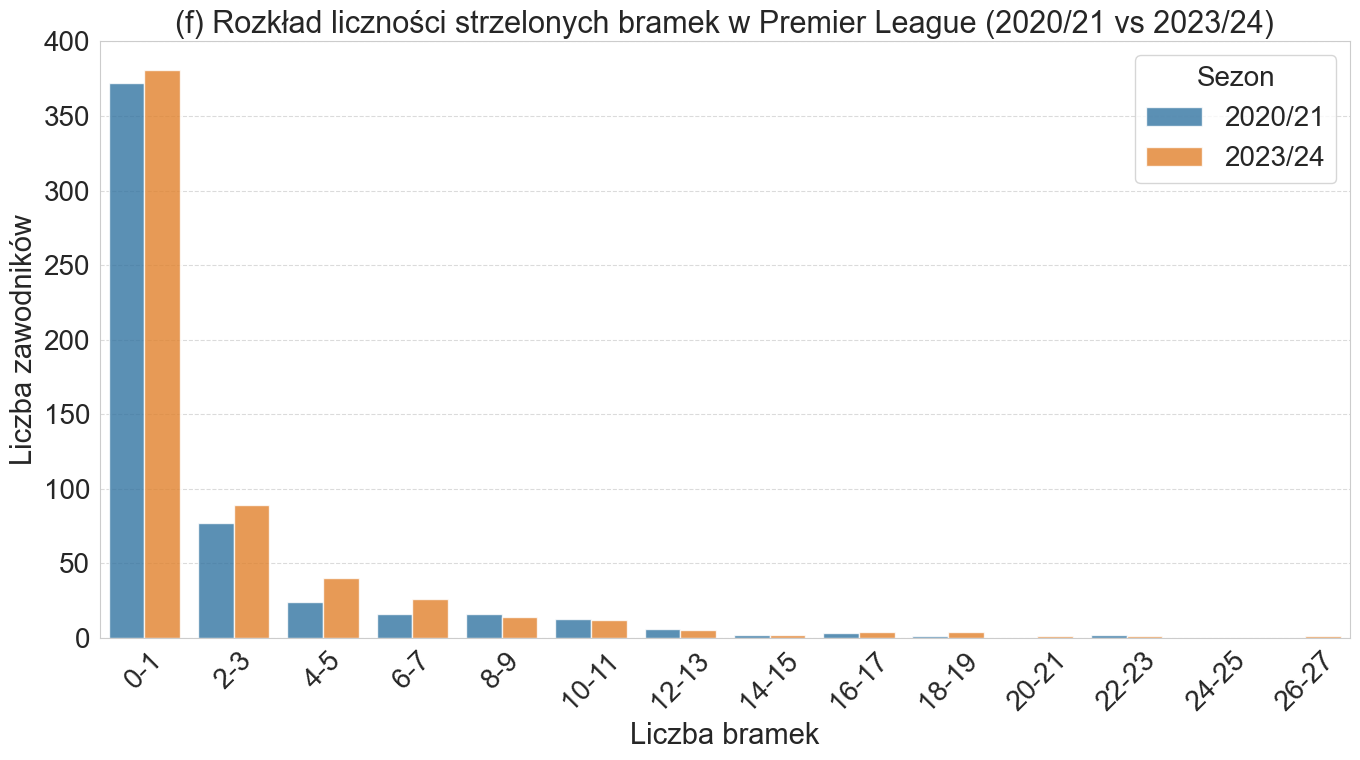

In [11]:
goals_2021 = df_2021['Goals'].dropna()
goals_2024 = df_2024['Gls'].dropna()

# Tworzenie przedziałów dla liczby bramek
bins = range(0, int(max(max(goals_2021), max(goals_2024))) + 2, 2)  # co 5 bramek (0-4, 5-9, itd.)

# Grupowanie danych
hist_2021 = pd.cut(goals_2021, bins=bins, right=False).value_counts().sort_index()
hist_2024 = pd.cut(goals_2024, bins=bins, right=False).value_counts().sort_index()

# Tworzenie DataFrame do wykresu
df_plot = pd.DataFrame({
    'Goals Range': [f"{int(i.left)}-{int(i.right)-1}" for i in hist_2021.index],
    '2020/21': hist_2021.values,
    '2023/24': hist_2024.values
})

# Topienie DataFrame dla seaborn
df_melted = df_plot.melt(id_vars='Goals Range', var_name='Season', value_name='Number of Players')

# Wykres słupkowy
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Goals Range', y='Number of Players', hue='Season', 
            palette=['#1f77b4', '#ff7f0e'], alpha=0.8)

# Dopracowanie wykresu
plt.title('(f) Rozkład liczności strzelonych bramek w Premier League (2020/21 vs 2023/24)', fontsize=22)
plt.xlabel('Liczba bramek', fontsize=21)
plt.ylabel('Liczba zawodników', fontsize=21)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sezon')

# Dopasowanie layoutu
plt.tight_layout()
plt.show()

Na podstawie tego wykresu ciężko wyciągnąć jednoznaczne wnioski – wartości dla obu sezonów są bardzo zbliżone. Może to wynikać z różnej liczby zawodników w analizowanych sezonach (2020/21: 532, 2023/24: 580). Dlatego dla lepszej porównywalności przedstawiamy wykres prawdopodobieństwa, który uwzględnia tę różnicę w liczebności prób.

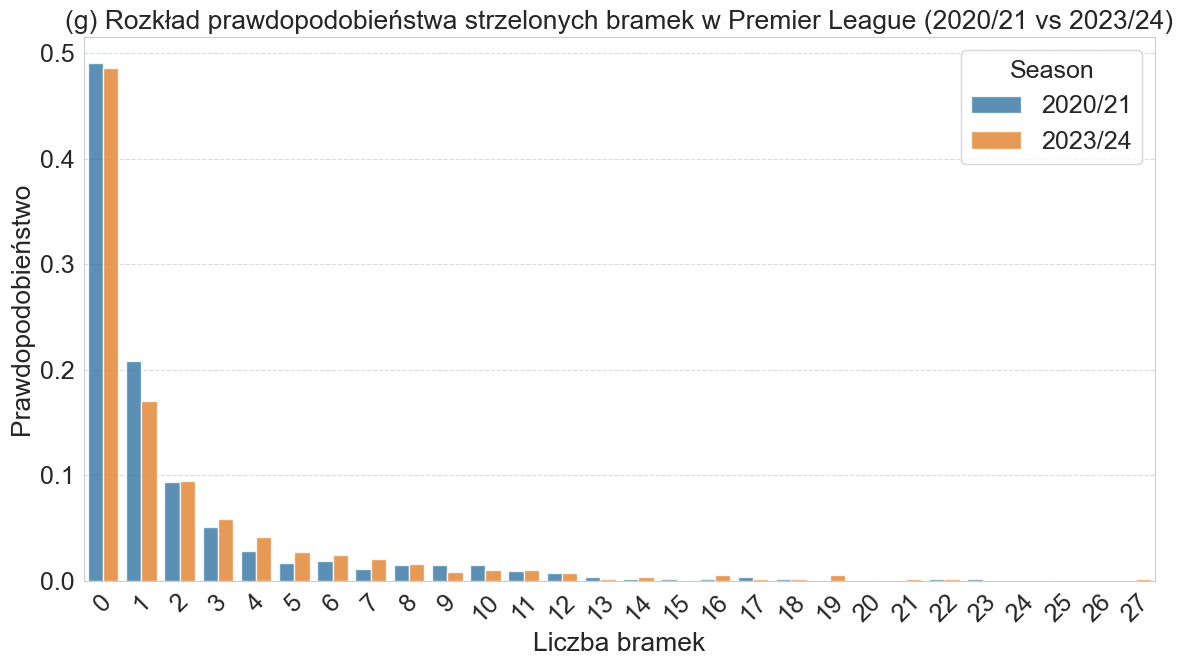

In [12]:
n_2021 = 532
n_2024 = 580
plt.rcParams['font.size'] = 18
# Przygotowanie danych (uwaga: różne nazwy kolumn - 'Goals' vs 'Gls')
goals_2021 = df_2021['Goals'].dropna()
goals_2024 = df_2024['Gls'].dropna()

# Tworzenie przedziałów co 2 bramki
bins = range(0, int(max(max(goals_2021), max(goals_2024))) + 2, 1)

# Grupowanie i normalizacja do prawdopodobieństwa
hist_2021 = pd.cut(goals_2021, bins=bins, right=False).value_counts().sort_index() / n_2021
hist_2024 = pd.cut(goals_2024, bins=bins, right=False).value_counts().sort_index() / n_2024

# Tworzenie DataFrame do wykresu
df_plot = pd.DataFrame({
    'Goals Range': [f"{int(i.left)}" for i in hist_2021.index],
    '2020/21': hist_2021.values,
    '2023/24': hist_2024.values
})

# Topienie DataFrame dla seaborn
df_melted = df_plot.melt(id_vars='Goals Range', var_name='Season', value_name='Probability')

# Wykres słupkowy z prawdopodobieństwem
plt.figure(figsize=(12, 7))
sns.barplot(data=df_melted, x='Goals Range', y='Probability', hue='Season', 
            palette=['#1f77b4', '#ff7f0e'], alpha=0.8)

# Dopracowanie wykresu
plt.title('(g) Rozkład prawdopodobieństwa strzelonych bramek w Premier League (2020/21 vs 2023/24)', fontsize=19)
plt.xlabel('Liczba bramek', fontsize=19)
plt.ylabel('Prawdopodobieństwo', fontsize=19)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Season')
plt.tight_layout()



plt.show()

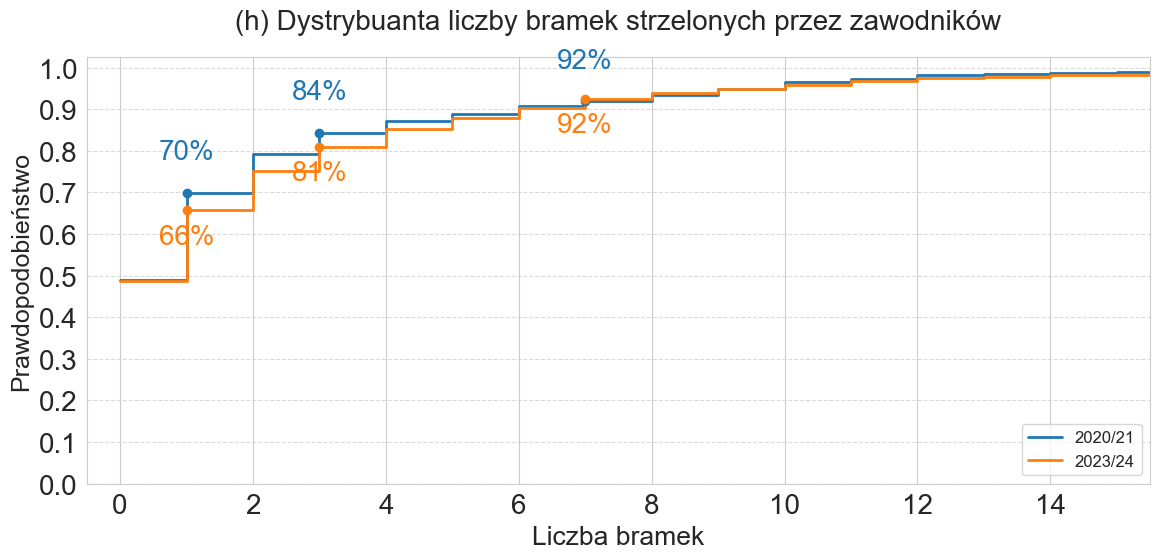

In [13]:
plt.rcParams['font.size'] = 20
n_2021 = 532
n_2024 = 580

# Przygotowanie dystrybuant
def create_cdf(goals, n_players):
    values, counts = np.unique(goals, return_counts=True)
    probabilities = counts / n_players
    cdf = np.cumsum(probabilities)
    return values, cdf

vals_2021, cdf_2021 = create_cdf(goals_2021, n_2021)
vals_2024, cdf_2024 = create_cdf(goals_2024, n_2024)

# Wykres
plt.figure(figsize=(12, 6))
plt.step(vals_2021, cdf_2021, where='post', label='2020/21', color='#1f77b4', linewidth=2)
plt.step(vals_2024, cdf_2024, where='post', label='2023/24', color='#ff7f0e', linewidth=2)

# Zaznaczenie kluczowych punktów
for x in [1, 3, 7]:
    y_2021 = cdf_2021[np.where(vals_2021 <= x)[0][-1]]
    y_2024 = cdf_2024[np.where(vals_2024 <= x)[0][-1]]
    plt.scatter(x, y_2021, color='#1f77b4', zorder=5)
    plt.scatter(x, y_2024, color='#ff7f0e', zorder=5)
    plt.text(x, y_2021+0.08, f'{y_2021:.0%}', ha='center', color='#1f77b4')
    plt.text(x, y_2024-0.08, f'{y_2024:.0%}', ha='center', color='#ff7f0e')

# Dopracowanie wykresu
plt.title('(h) Dystrybuanta liczby bramek strzelonych przez zawodników', fontsize=20, pad=20)
plt.xlabel('Liczba bramek', fontsize=19)
plt.ylabel('Prawdopodobieństwo', fontsize=18)
plt.legend(loc='lower right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(max(vals_2021), max(vals_2024))+1, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(-0.5, 15.5)
plt.tight_layout()

plt.show()

Porównując rozkłady między sezonami, widać pewne charakterystyczne różnice. Pomimo podobnego kształtu rozkładów, w 2020/21 - rozgrywanym bez udziału publiczności, widać większe skupienie zawodników w przedziale 0-1 bramek oraz mniejszy udział strzelców w przedziałach 3-7 goli. To potwierdza hipotezę, że brak presji kibiców mógł sprzyjać lepszej organizacji defensywy.

## Skuteczność drużynowa

Aby dokładniej zbadać zaobserwowane różnice w rozkładzie bramek między sezonami, przeprowadzimy analizę z podziałem na poszczególne drużyny. Takie podejście pozwoli nam sprawdzić, czy zmniejszona liczba goli w sezonie 2020/21 była zjawiskiem powszechnym we wszystkich zespołach, czy może wynikała ze szczególnie dobrej gry defensywnej wybranych klubów. Jednocześnie zobaczymy, czy wzrost liczby strzelców w przedziale 3-7 goli w sezonie 2023/24 dotyczył całej ligi równomiernie, czy był napędzany przez konkretne, bardziej ofensywne drużyny.

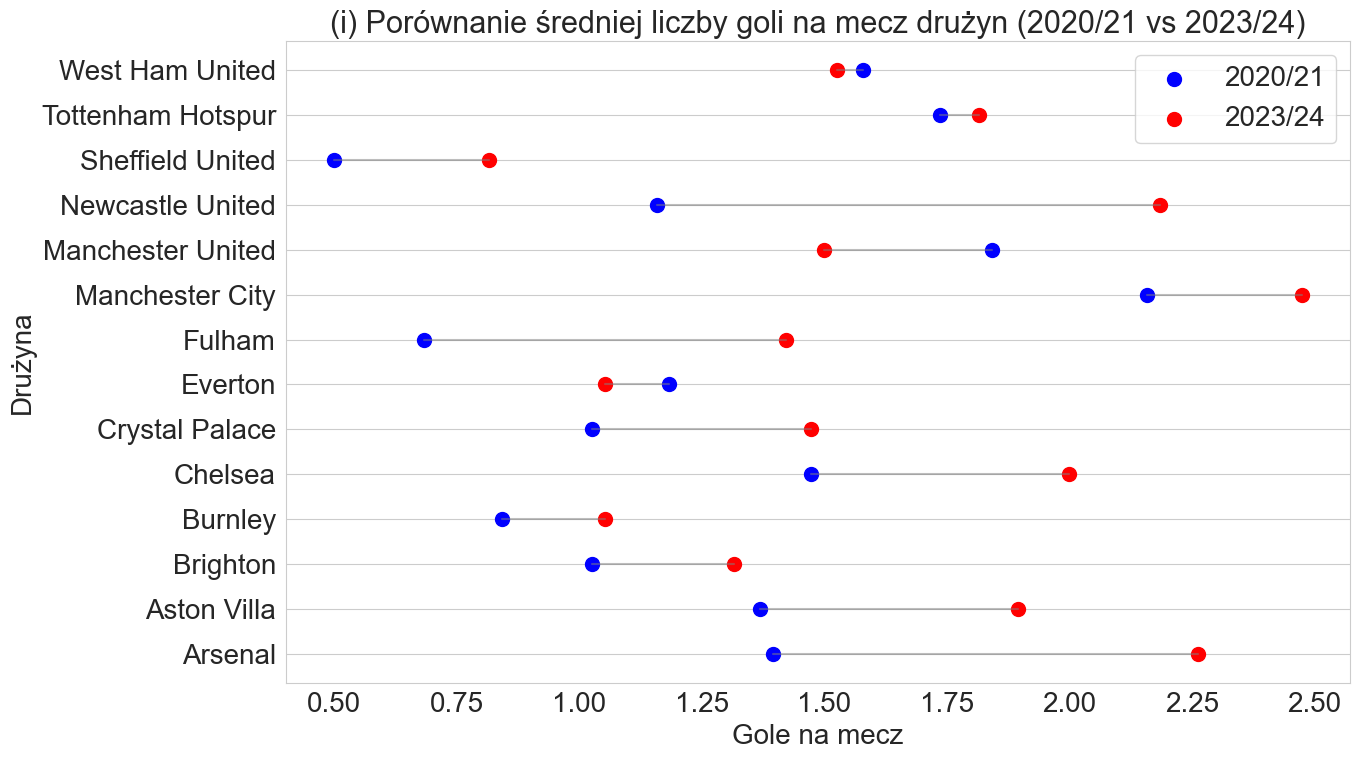

In [14]:
# Grupowanie po drużynach dla sezonu 2020/21
team_2021 = df_2021.groupby('Club').agg({
    'Goals': 'sum',
    'Matches': 'first'  # Zakładamy, że wszystkie mecze są w danych
}).reset_index()
team_2021['goals_per_match'] = team_2021['Goals'] / 38  # 38 meczów na zespół

# Grupowanie po drużynach dla sezonu 2023/24
team_2024 = df_2024.groupby('Team').agg({
    'Gls': 'sum',
    'MP': 'first'
}).reset_index()
team_2024['goals_per_match'] = team_2024['Gls'] / 38

plt.figure(figsize=(14, 8))

# Sortowanie drużyn według goli w 2023/24
team_2024 = team_2024.sort_values('goals_per_match', ascending=False)
teams_order = team_2024['Team']

# Przygotowanie danych do łączenia
team_comparison = pd.merge(
    team_2021.rename(columns={'Club': 'Team', 'goals_per_match': '2020/21'}),
    team_2024.rename(columns={'Team': 'Team', 'goals_per_match': '2023/24'}),
    on='Team',
    how='inner'
)

# Wykres lollipop
for i, team in enumerate(team_comparison['Team']):
    plt.plot([team_comparison['2020/21'][i], team_comparison['2023/24'][i]], 
             [i, i], color='grey', alpha=0.5)
plt.scatter(team_comparison['2020/21'], range(len(team_comparison)), 
            color='blue', label='2020/21', s=100)
plt.scatter(team_comparison['2023/24'], range(len(team_comparison)), 
            color='red', label='2023/24', s=100)

plt.yticks(range(len(team_comparison)), team_comparison['Team'])
plt.title('(i) Porównanie średniej liczby goli na mecz drużyn (2020/21 vs 2023/24)', fontsize=22)
plt.xlabel('Gole na mecz', fontsize=20)
plt.ylabel('Drużyna', fontsize=20)
plt.legend()
plt.grid(axis='x')

plt.tight_layout()
plt.show()



Analiza z podziałem na drużyny wyraźnie pokazuje, że w sezonie 2023/24 dla ogromnej większości klubów liczba strzelonych bramek znacząco wzrosła w porównaniu z pandemicznym sezonem 2020/21. Szczególnie widoczny skok skuteczności odnotowały takie zespoły jak Fulham, Newcastle United i Arsenal, gdzie różnica w liczbie goli strzelonych przez zawodników tych drużyn między sezonami jest wyjątkowo wyraźna. Ten wzrost ofensywnej skuteczności w całej lidze, a zwłaszcza w wymienionych klubach, dodatkowo podkreśla, jak istotny wpływ na wyniki może mieć obecność kibiców na stadionach.

## Czy napastnicy też grali lepiej bez kibiców?

Na sam koniec przeanalizujemy, czy zaobserwowane zmiany dotyczyły wyłącznie obrońców, czy również napastników. W tym celu porównamy wskaźnik xG (expected Goals) na 90 minut z rzeczywistą liczbą strzelonych goli na 90 minut dla obu sezonów. To porównanie pozwoli nam ocenić, czy piłkarze byli bardziej skuteczni w realizacji sytuacji bramkowych w warunkach braku kibiców. Aby wyniki były bardziej miarodajne, w analizie uwzględnimy wyłącznie tych zawodników, którzy rozegrali co najmniej 10 meczów w sezonie oraz strzelili minimum 5 goli. Takie zawężenie próby wyeliminuje przypadkowe wahania wynikające od sporadycznie grających zawodników.

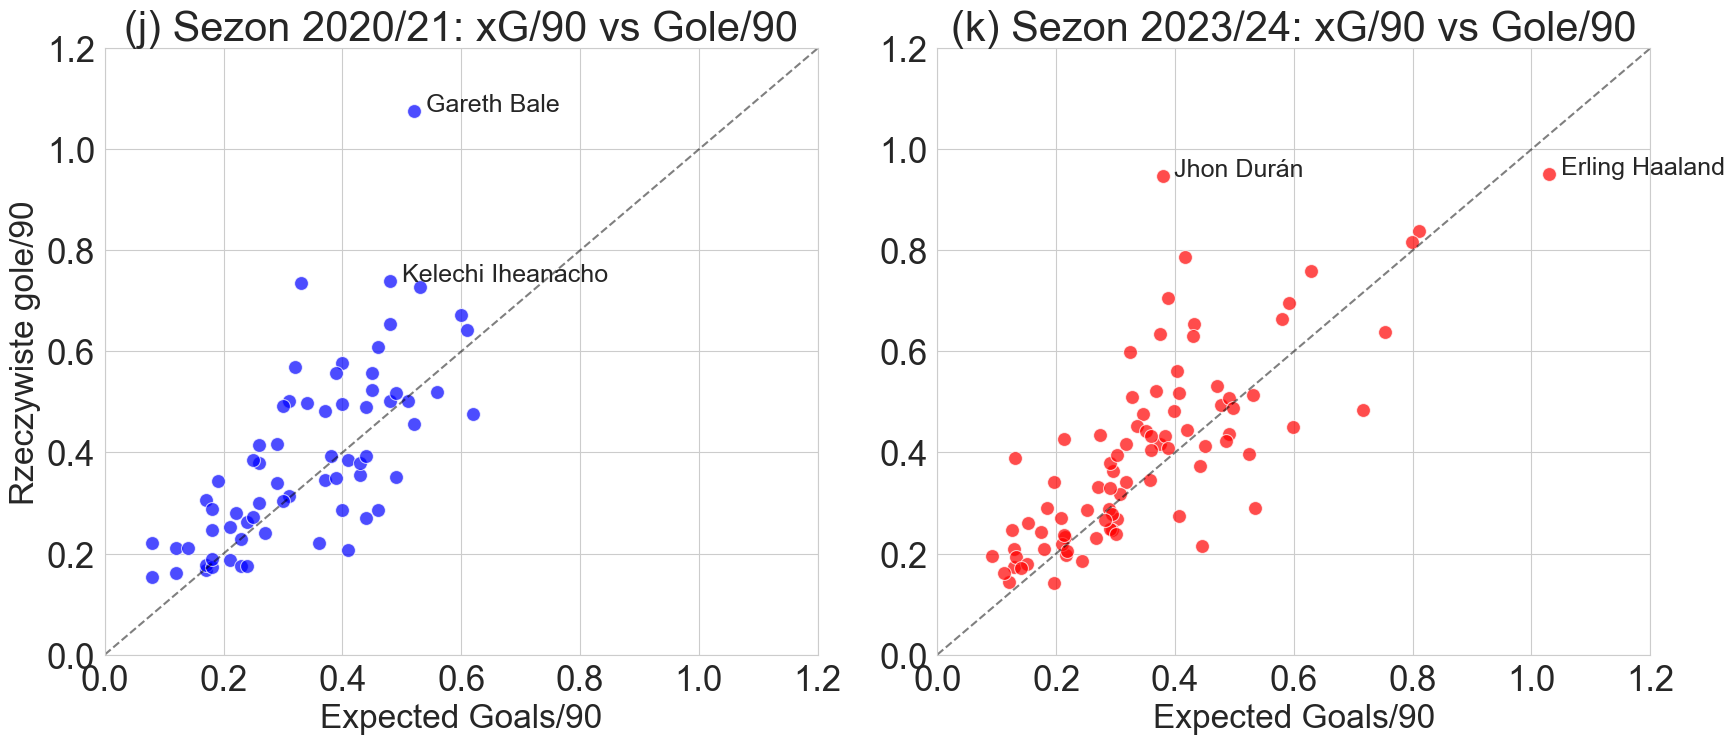

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Przygotowanie danych dla sezonu 2020/21
df_2021['goals_per90'] = (df_2021['Goals'] / df_2021['Mins']) * 90
df_2021['xG_per90'] = df_2021['xG']  # Zakładamy, że to już jest per 90

# Przygotowanie danych dla sezonu 2023/24
df_2024['goals_per90'] = (df_2024['Gls'] / df_2024['Min']) * 90
df_2024['xG_per90'] = (df_2024['xG'] / df_2024['Min']) * 90

# Filtracja zawodników - min 10 meczów i min 5 goli
min_matches = 10
min_goals = 5

df_2021_filtered = df_2021[(df_2021['Matches'] >= min_matches) & (df_2021['Goals'] >= min_goals)]
df_2024_filtered = df_2024[(df_2024['MP'] >= min_matches) & (df_2024['Gls'] >= min_goals)]

# Styl wykresów
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 25

# Utworzenie figury z dwoma podwykresami
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Wykres dla sezonu 2020/21
sns.scatterplot(data=df_2021_filtered, x='xG_per90', y='goals_per90', 
                s=100, alpha=0.7, color='blue', ax=ax1)
ax1.plot([0, 1.2], [0, 1.2], 'k--', alpha=0.5)
ax1.set_title('(j) Sezon 2020/21: xG/90 vs Gole/90')
ax1.set_xlabel('Expected Goals/90', fontsize=24)
ax1.set_ylabel('Rzeczywiste gole/90', fontsize=24)
ax1.set_xlim(0, 1.2)
ax1.set_ylim(0, 1.2)
ax1.grid(True)

# Dodanie nazwisk top zawodników 2020/21
top_players_2021 = df_2021_filtered.nlargest(2, 'goals_per90')
for i, row in top_players_2021.iterrows():
    ax1.text(row['xG_per90']+0.02, row['goals_per90'], row['Name'], 
             fontsize=18, ha='left')

# Wykres dla sezonu 2023/24
sns.scatterplot(data=df_2024_filtered, x='xG_per90', y='goals_per90', 
                s=100, alpha=0.7, color='red', ax=ax2)
ax2.plot([0, 1.2], [0, 1.2], 'k--', alpha=0.5)
ax2.set_title('(k) Sezon 2023/24: xG/90 vs Gole/90')
ax2.set_xlabel('Expected Goals/90', fontsize=24)
ax2.set_ylabel('')
ax2.set_xlim(0, 1.2)
ax2.set_ylim(0, 1.2)
ax2.grid(True)

# Dodanie nazwisk top zawodników 2023/24
top_players_2024 = df_2024_filtered.nlargest(2, 'goals_per90')
for i, row in top_players_2024.iterrows():
    ax2.text(row['xG_per90']+0.02, row['goals_per90'], row['Player'], 
             fontsize=18, ha='left')

# Obliczenie i wyświetlenie średnich różnic
diff_2021 = np.mean(df_2021_filtered['goals_per90'] - df_2021_filtered['xG_per90'])
diff_2024 = np.mean(df_2024_filtered['goals_per90'] - df_2024_filtered['xG_per90'])



plt.tight_layout()
plt.show()

Porównując wykresy xG na 90 minut z rzeczywistymi golami na 90 minut dla obu sezonów, widać uderzająco podobne rozkłady. Zarówno w sezonie 2020/21 rozgrywanym bez kibiców, jak i w sezonie 2023/24 z pełnymi stadionami, napastnicy wykazywali zbliżoną skuteczność w realizacji sytuacji bramkowych. Ta obserwacja sugeruje, że wpływ obecności publiczności na efektywność gry ofensywnej był marginalny. Można zatem wnioskować, że różnice w ogólnej liczbie bramek między sezonami wynikały raczej ze zmian w organizacji defensywnej drużyn niż ze zmiany formy napastników. Innymi słowy: kibice mogli wpływać na taktykę zespołów, ale nie na precyzję strzelców w bezpośredniej konfrontacji z bramkarzem.

# Podsumowanie

## Potwierdzenie głównej hipotezy

Badanie wyraźnie wykazało, że brak kibiców w sezonie 2020/21 istotnie wpłynął na:

 - Lepszą organizację defensywy (mniej straconych bramek mimo podobnych wartości xG)
 - Mniejszą liczbę żółtych kartek (średnio 2.11 vs 2.85 w sezonie 2023/24)
 - Zmniejszoną skuteczność ofensywną (średnio 2.69 vs 3.28 gola/mecz z kibicami)

## Odkrycie dotyczące napastników

Porównanie xG vs rzeczywiste gole (dla zawodników z min. 10 meczami i 5 golami) ujawniło:

 - Brak istotnej różnicy w skuteczności między sezonami
 - Wniosek: Kibice wpływali głównie na taktykę zespołów, a nie na precyzję strzelców

## Wnioski ogólne
 - Presja kibiców zwiększa intensywność gry (więcej fauli, kartek, ofensywnych akcji)
 - "Sterylne" warunki sezonu 2020/21 sprzyjały defensywnemu zorganizowaniu
 - Naturalny eksperyment pandemiczny dostarczył unikalnych danych o wpływie otoczenia na dynamikę gry

## Wartość naukowa

Badanie potwierdza, że czynniki pozasportowe (jak obecność publiczności) mogą znacząco modyfikować:

 - Statystyki dyscyplinarne
 - Efektywność taktyczną
 - Psychologię podejmowania decyzji na boisku